In [324]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

In [26]:
# Path to your GML file
gml_file_path = 'graphs/network-3-families.gml'

# Function to read a GML file with non-ASCII characters
def read_gml_file(file_path):
    with open(file_path, 'rb') as file:
        content = file.read()
    content = content.decode('utf-8')
    return content

# Read and parse the GML file using NetworkX
gml_content = read_gml_file(gml_file_path)
g = nx.parse_gml(gml_content)
print(g)

Graph with 2919 nodes and 4228 edges


In [352]:
cnodes = []
c = ["RED", "GREEN", "BLUE", "YELLOW", "BLACK", "WHITE", "ORANGE (COLOR)", "PURPLE", "BROWN", "GREY"]
for node in g.nodes():
    if g.nodes[node]["Gloss"] in c:
        print(g.nodes[node]["ID"])
        cnodes.append(node)

156
1424
837
1335
163
1425
153
2409
3328
2452


In [46]:
d = {}
for n in g:
    d[g.nodes[n]["Gloss"]] = [g.nodes[b]["Gloss"] for a, b in list(g.edges(n))]
    # print(g.nodes[n]["Gloss"], "--->", [g.nodes[b]["Gloss"] for a, b in list(g.edges(n))])

In [49]:
d["RED"]

['FLAME', 'STINKING', 'DARK', 'BLOOD', 'RIPE', 'FIRE', 'FLOWER', 'YELLOW']

In [ ]:
for edge in g.edges():
    l = nx.get_edge_attributes(g, 'languages')
    print(l[edge].split(";"))

In [ ]:
d = {}
for n in g:
    d[g.nodes[n]["Gloss"]] = {"edges": [g.nodes[b]["Gloss"] for _, b in list(g.edges(n))],
                              "languages": g.nodes[n]["Language"]}
    # print(g.nodes[n]["Gloss"], "--->", [g.nodes[b]["Gloss"] for a, b in list(g.edges(n))])

In [519]:
def draw_subgraph(node_of_interest):
    n = str(node_of_interest)
    neighbors = list(g.neighbors(n))
    subgraph = g.subgraph([n] + neighbors)

    colour_dict = {}
    noi = [str(n) for n in cnodes]

    for node in noi.copy():
        node = str(node)
        colour_dict[node] = g.nodes[node]["Gloss"]
        neighbors = list(g.neighbors(n))

    colour_dict["1335"] = "lightgrey"

    # Draw the subgraph
    pos = nx.spring_layout(subgraph, iterations=1000, k=10)

    colour_list = list(pd.Series(pos.keys()).replace(colour_dict))

    def replace_intable(strings):
        for i in range(len(strings)):
            try:
                int(strings[i])
                strings[i] = "white"
            except ValueError:
                continue
        return strings

    colour_list = replace_intable(colour_list)
    
    plt.figure(figsize=(8,6))

    labels = nx.get_node_attributes(subgraph, 'Gloss')
    edge_labels = nx.get_edge_attributes(subgraph, 'LanguageWeight')
    edge_widths = [math.log(subgraph[u][v]['LanguageWeight'], 2) for u, v in subgraph.edges()]

    nx.draw(subgraph, pos, font_family="serif",  edge_color='lightgrey', width=edge_widths, node_size=3000, alpha=0.4, linewidths=0, node_color=colour_list)

    nx.draw_networkx_labels(subgraph, pos, labels=labels, font_family="serif",  font_weight='bold')
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_family="serif", rotate=False)

    plt.title("Subgraph of node " + labels[n], fontdict={'fontsize': 20, 'fontweight': 'bold', 'fontname': 'serif'}, pad=10)
    plt.savefig("plots/subgraph_" + labels[n] + ".png")
    plt.show()

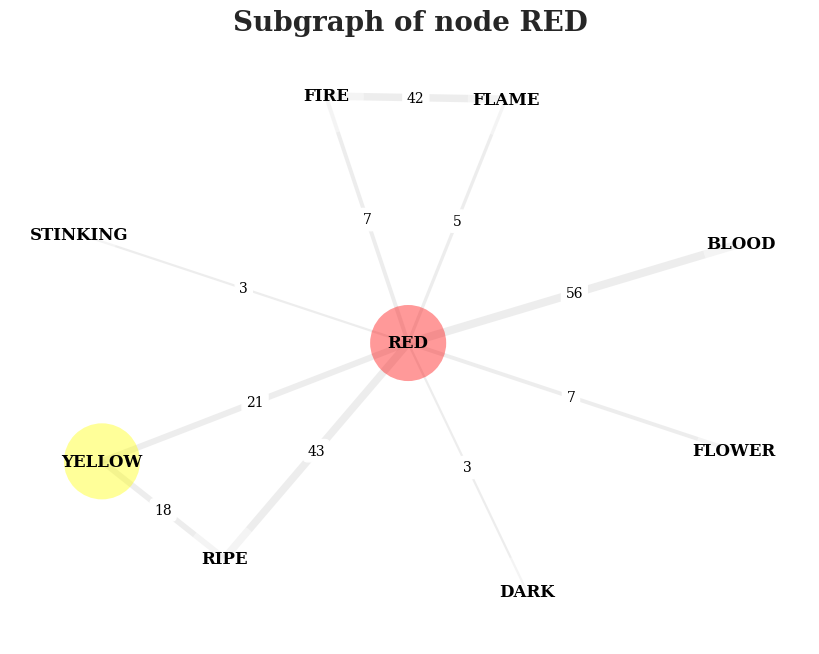

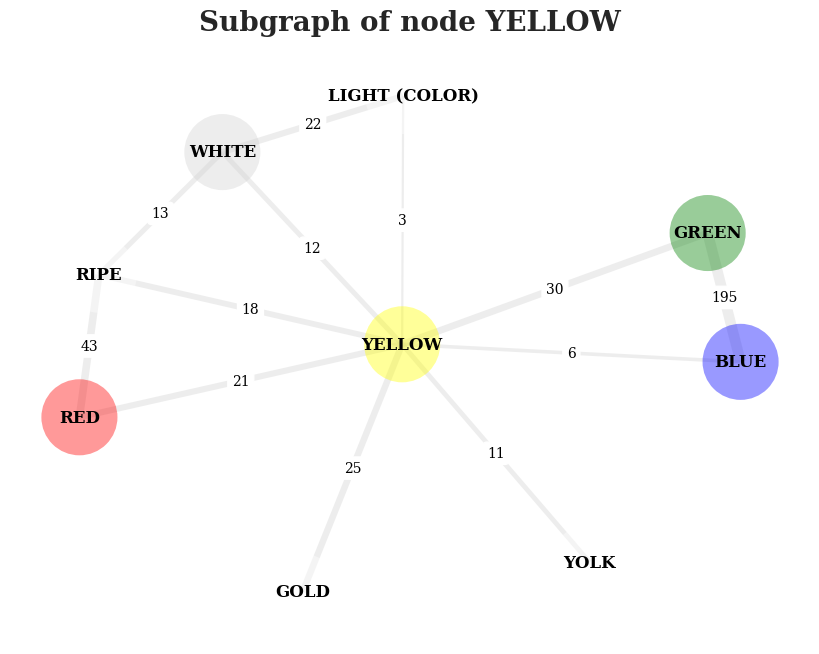

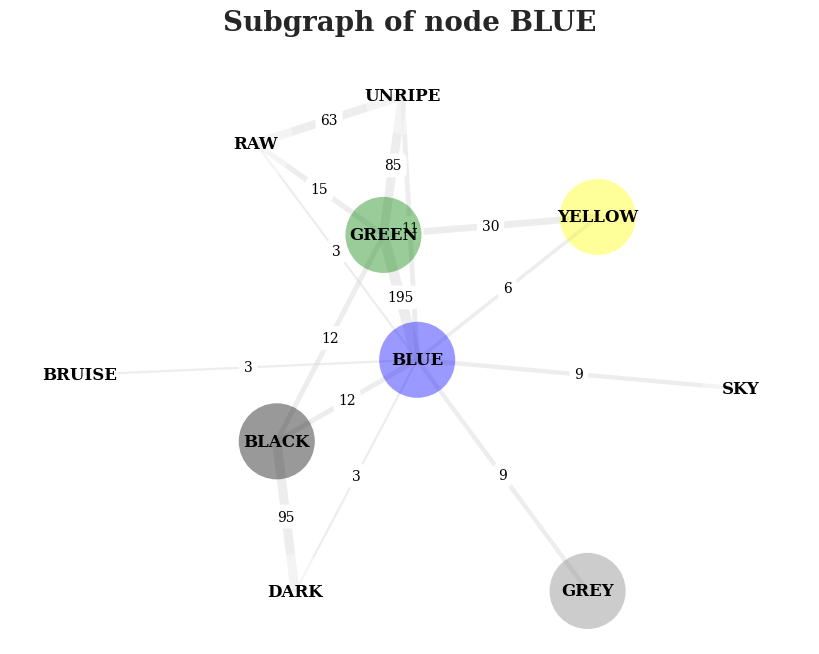

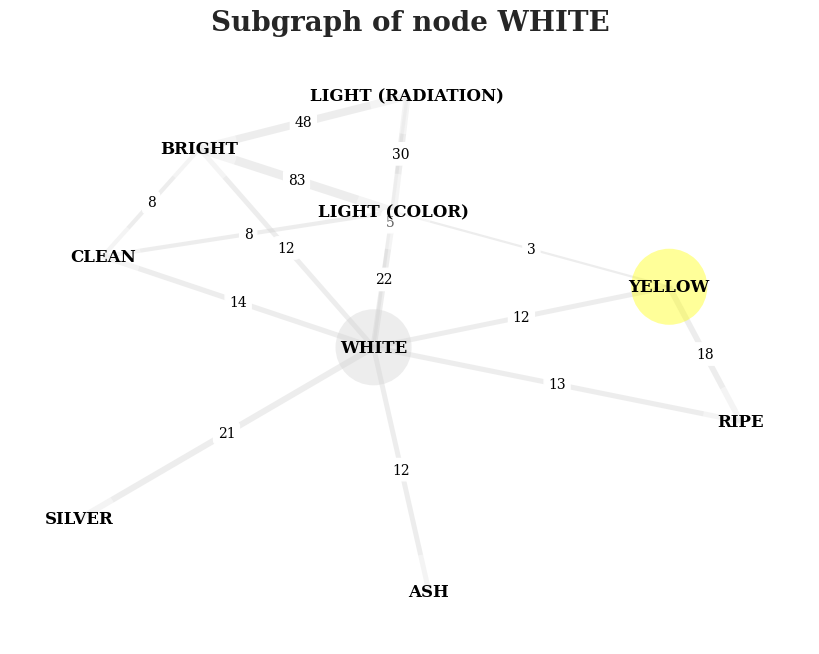

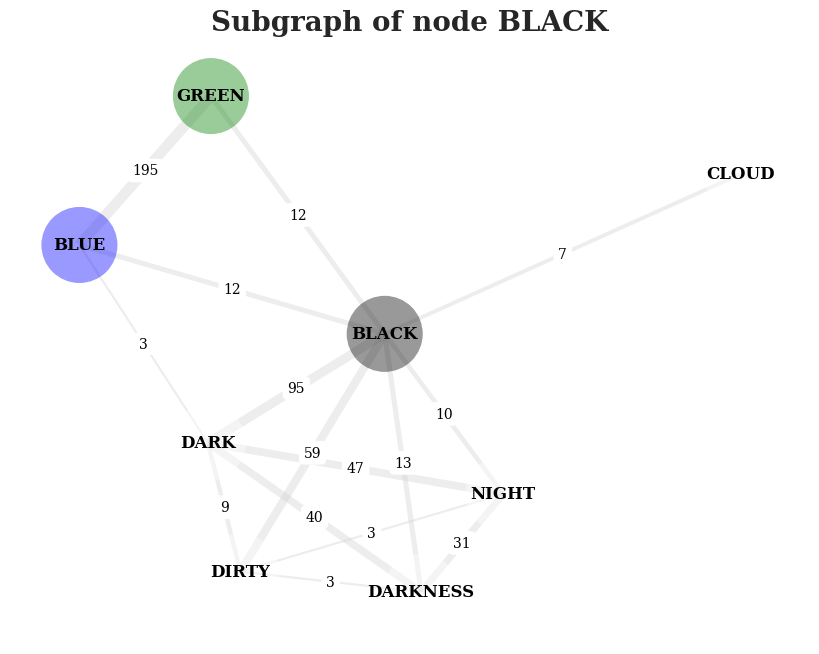

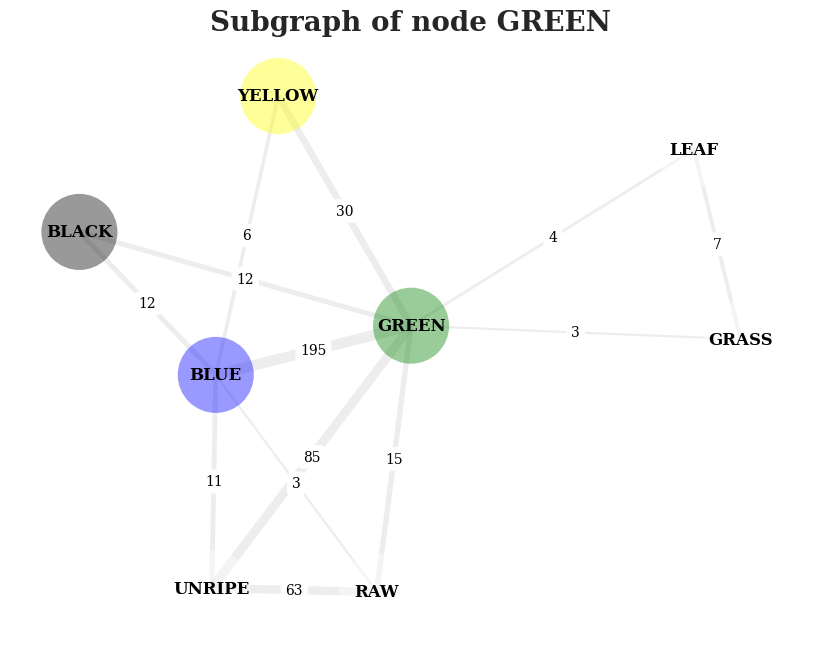

In [520]:
for node in cnodes[:6]:
    draw_subgraph(node)

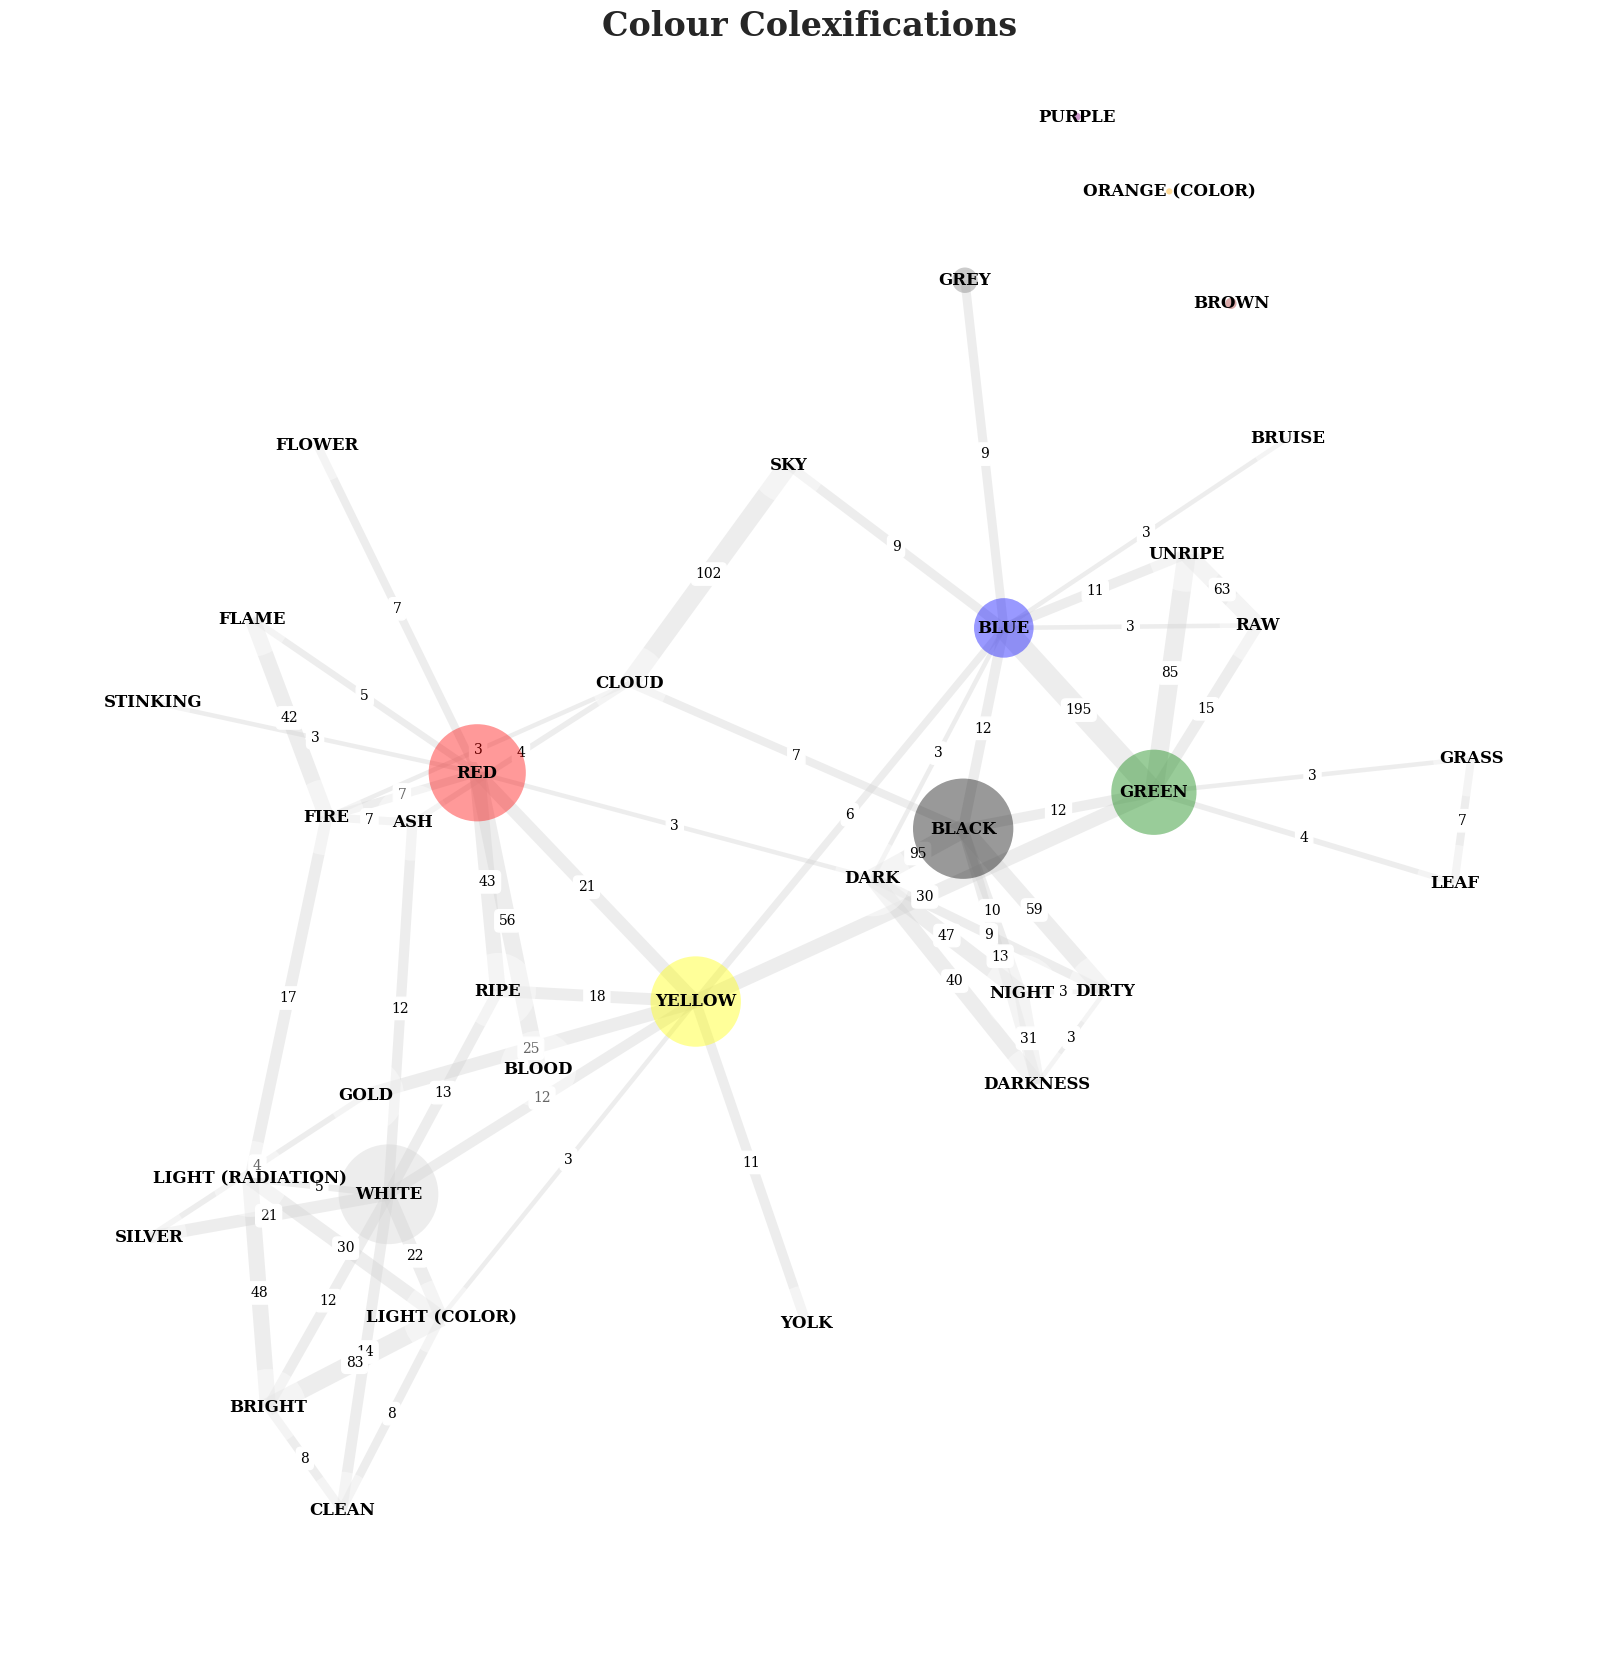

In [523]:
colour_dict = {}
node_size = {}
noi = [str(n) for n in cnodes]

for n in noi.copy():
    n = str(n)
    node_size[n] = 2* g.nodes[n]["LanguageFrequency"]
    colour_dict[n] = g.nodes[n]["Gloss"]
    neighbors = list(g.neighbors(n))
    noi = noi + neighbors

subgraph = g.subgraph(noi)
colour_dict["1335"] = "lightgrey"
colour_dict["3328"] = "orange"

fixed_positions = {"3328": (92, 92), "2452": (80,100), "2409": (100,80)}

# Draw the subgraph
pos = nx.spring_layout(subgraph,  fixed=fixed_positions.keys(), pos=fixed_positions, scale=1000)
#pos = nx.kamada_kawai_layout(subgraph, scale=1000,)

size_list = list(pd.Series(pos.keys()).replace(node_size))
colour_list = list(pd.Series(pos.keys()).replace(colour_dict))

def replace_intable(strings):
    for i in range(len(strings)):
        try:
            int(strings[i])
            strings[i] = "white"
        except ValueError:
            continue
    return strings

colour_list = replace_intable(colour_list)

for s in size_list.copy():
    if type(s) == str:
        size_list[size_list.index(s)] = 3000

plt.figure(figsize=(16,16))

labels = nx.get_node_attributes(subgraph, 'Gloss')
edge_labels = nx.get_edge_attributes(subgraph, 'LanguageWeight')
edge_widths = [math.log(subgraph[u][v]['LanguageWeight'], 1.4) for u, v in subgraph.edges()]

nx.draw(subgraph, pos, font_family="serif",  edge_color='lightgrey', width=edge_widths, node_size=size_list, node_color=colour_list, alpha=0.4, linewidths=0)

nx.draw_networkx_labels(subgraph, pos, labels=labels, font_family="serif",  font_weight='bold')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_family="serif", rotate=False)

plt.title("Colour Colexifications", fontdict={'fontsize': 24, 'fontweight': 'bold', 'fontname': 'serif'})
plt.show()